# Global Statistics

I verify that I am the sole author of the programmes contained in this archive, except where explicitly stated to the contrary

Signature: Juncai Yang
Date: 2022/08/08

In [1]:
# -*- coding:utf-8 -*-
import geopandas
from shapely.geometry import Point, LineString
from geopandas import GeoDataFrame
# conda install -c conda-forge spaghetti (if using conda)
import spaghetti
import os
import glob
from libpysal.weights import Queen
import pandas as pd
import geopandas as gpd
import networkx as nx
import osmnx
from matplotlib import pyplot as plt
import matplotlib
from pyproj import Proj
import smopy
import seaborn as sns
import collections
import numpy as np
import math
from matplotlib import cm
import esda
from haversine import haversine
from splot.esda import lisa_cluster
from splot.esda import moran_scatterplot, lisa_cluster, plot_moran
import statsmodels.api as sm
import warnings
import pysal as ps
from pysal.viz import mapclassify
import palettable as pltt
from seaborn import palplot
import zipfile
import folium  

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

D:\ProgramData\Anaconda3\envs\msda2021\lib\site-packages\spaghetti\network.py:36: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


In [2]:
# read the file
def read_csv(data_file):
    df = pd.read_csv("./"+data_file)
    # df = adult_df.drop(columns='fnlwgt')
    return df

# Line chart of carbon emissions

In [3]:
carbon_df = read_csv('./raw_data/carbon_emissions_data/Global_Countries_CO2.csv')
carbon_df = carbon_df.dropna().reset_index(drop=True)


In [4]:
#carbon_df.loc[carbon_df['Code'] == 'USA' and carbon_df['Code'] =='UK']
carbon_df = carbon_df[carbon_df['Code'].isin(['USA','GBR','CHN'])].reset_index(drop=True)

In [5]:
carbon_df

,Entity,Code,Year,Annual CO2 emissions (per capita)
0,China,CHN,1899,0.0002
1,China,CHN,1902,0.0002
2,China,CHN,1903,0.0048
3,China,CHN,1904,0.0051
4,China,CHN,1905,0.0056
...,...,...,...,...
562,United States,USA,2016,16.2469
563,United States,USA,2017,16.0197
564,United States,USA,2018,16.4340
565,United States,USA,2019,15.9720


In [6]:
carbon_df.iloc[20:30 ,-1:]

,Annual CO2 emissions (per capita)
20,0.0532
21,0.0558
22,0.0671
23,0.0729
24,0.0688
25,0.0611
26,0.0690
27,0.0699
28,0.0731
29,0.0770


In [7]:
carbon_df = carbon_df.loc[carbon_df['Year']>=2011].reset_index(drop=True)

In [8]:
carbon_df

,Entity,Code,Year,Annual CO2 emissions (per capita)
0,China,CHN,2011,6.9223
1,China,CHN,2012,7.0623
2,China,CHN,2013,7.1506
3,China,CHN,2014,7.1353
4,China,CHN,2015,7.0003
5,China,CHN,2016,6.8742
6,China,CHN,2017,6.9812
7,China,CHN,2018,7.2077
8,China,CHN,2019,7.3163
9,China,CHN,2020,7.4117


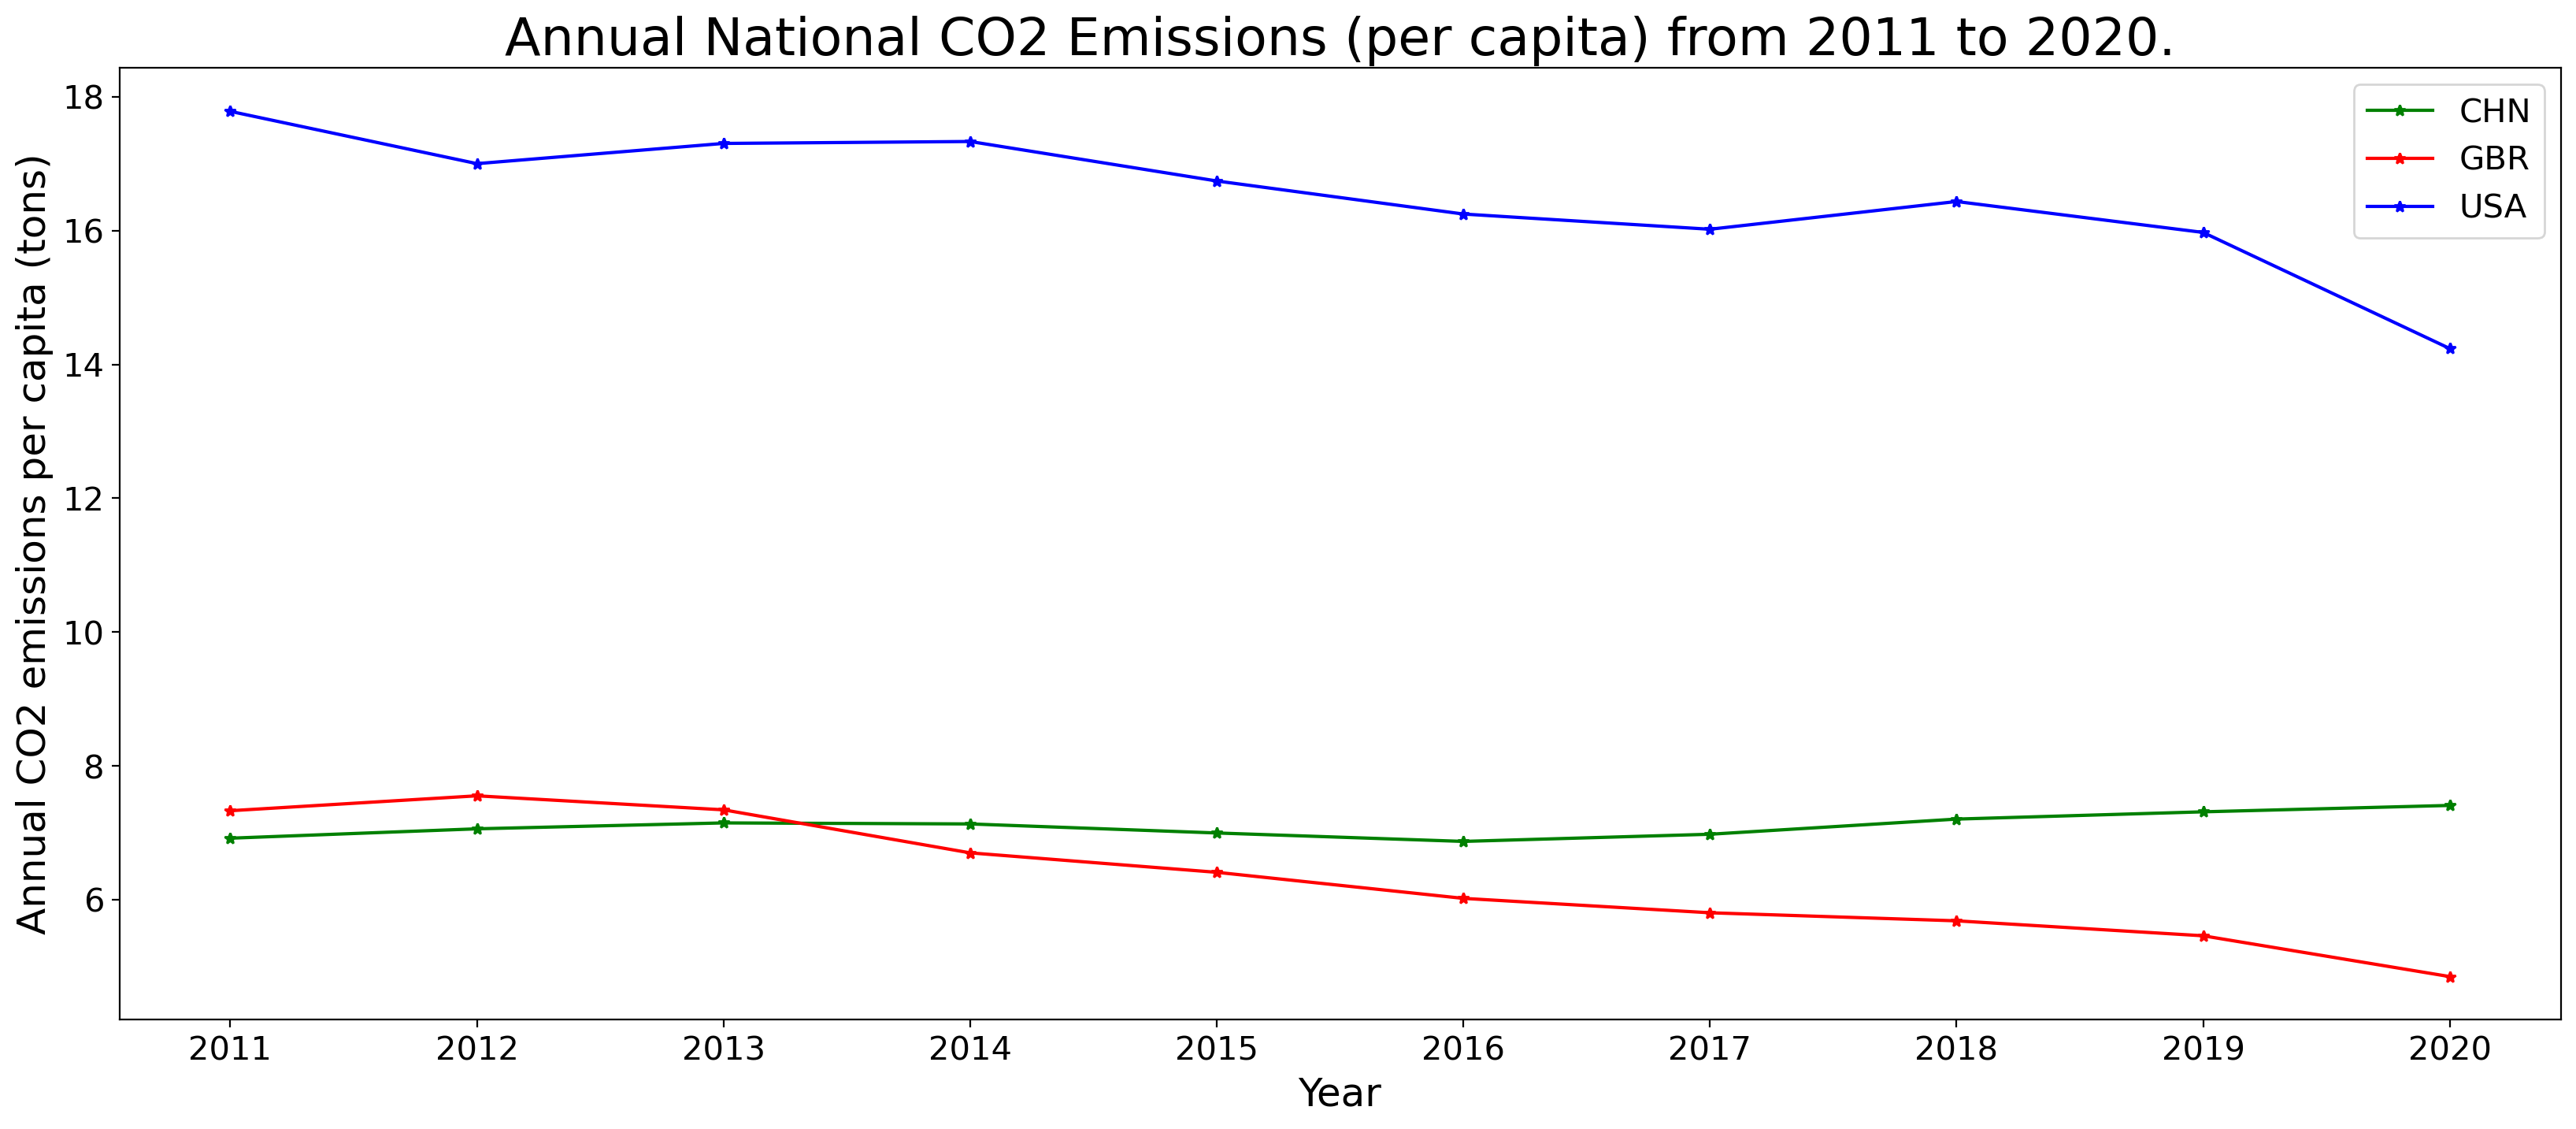

In [9]:
# Set the figuresize and dpi
plt.figure(figsize=(20, 8), dpi=200)
# Draw the bar
x = carbon_df.iloc[0:10 ,-2:-1].values
y1 = carbon_df.iloc[0:10 ,-1:].values
y2 = carbon_df.iloc[10:20 ,-1:].values
y3 = carbon_df.iloc[20:30 ,-1:].values

plt.plot(x,  y1,"g", marker='*', markersize=5, label="CHN")
plt.plot(x,  y2,"r", marker='*', markersize=5, label="GBR")
plt.plot(x,  y3,"b", marker='*', markersize=5, label="USA")
plt.xticks(x, fontsize=15) 
plt.yticks(fontsize=15)
plt.title('Annual National CO2 Emissions (per capita) from 2011 to 2020.',fontsize=24)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Annual CO2 emissions per capita (tons)',fontsize=18)
# # Show the value of each bar
plt.legend(['CHN', 'GBR','USA'],fontsize=15)
plt.show()

# Stacked bar graph of broadband speed

In [10]:
speed_df = read_csv('./raw_data/broadband_speed_data/worldwide_speed_league_data.csv')
speed_df = speed_df.dropna().reset_index(drop=True)

In [11]:
speed_df

,Country,Country Code,Region,Position (2020) – Out of 221,Position (2019) – Out of 207,Position (2018) – Out of 200,Position (2017) – Out of 189,Mean download speed (2020),Mean download speed (2019),Mean download speed (2018),Mean download speed (2017)
0,Liechtenstein,LI,WESTERN EUROPE,1,36,37,44,229.98,22.04,17.71,11.40
1,Jersey,JE,WESTERN EUROPE,2,3,10,14,218.37,67.46,30.90,23.30
2,Andorra,AD,WESTERN EUROPE,3,12,18,42,213.41,38.31,27.14,12.07
3,Gibraltar,GI,WESTERN EUROPE,4,38,44,38,183.09,20.27,14.71,13.18
4,Luxembourg,LU,WESTERN EUROPE,5,7,8,33,118.05,41.69,35.14,15.52
...,...,...,...,...,...,...,...,...,...,...,...
215,Syria,SY,NEAR EAST,217,195,194,183,0.76,0.95,0.81,0.68
216,Equatorial Guinea,GQ,SUB-SAHARAN AFRICA,218,205,0,0,0.75,0.51,0.00,0.00
217,Turkmenistan,TM,CIS (FORMER USSR),219,203,198,142,0.74,0.70,0.56,1.40
218,Yemen,YE,NEAR EAST,220,207,200,189,0.65,0.38,0.31,0.34


In [12]:
speed_df = speed_df[speed_df['Country Code'].isin(['CN','GB','US'])].reset_index(drop=True)

In [13]:
speed_df 

,Country,Country Code,Region,Position (2020) – Out of 221,Position (2019) – Out of 207,Position (2018) – Out of 200,Position (2017) – Out of 189,Mean download speed (2020),Mean download speed (2019),Mean download speed (2018),Mean download speed (2017)
0,United States,US,NORTHERN AMERICA,20,15,20,21,71.30,32.89,25.86,20.00
1,United Kingdom,GB,WESTERN EUROPE,47,34,35,31,37.82,22.37,18.57,16.51
2,China,CN,ASIA (EX. NEAR EAST),200,152,141,134,2.09,2.69,2.38,1.55


In [14]:
speed_df.iloc[0:1 ,7:11].T.values.flatten()[::-1]

array([20.  , 25.86, 32.89, 71.3 ])

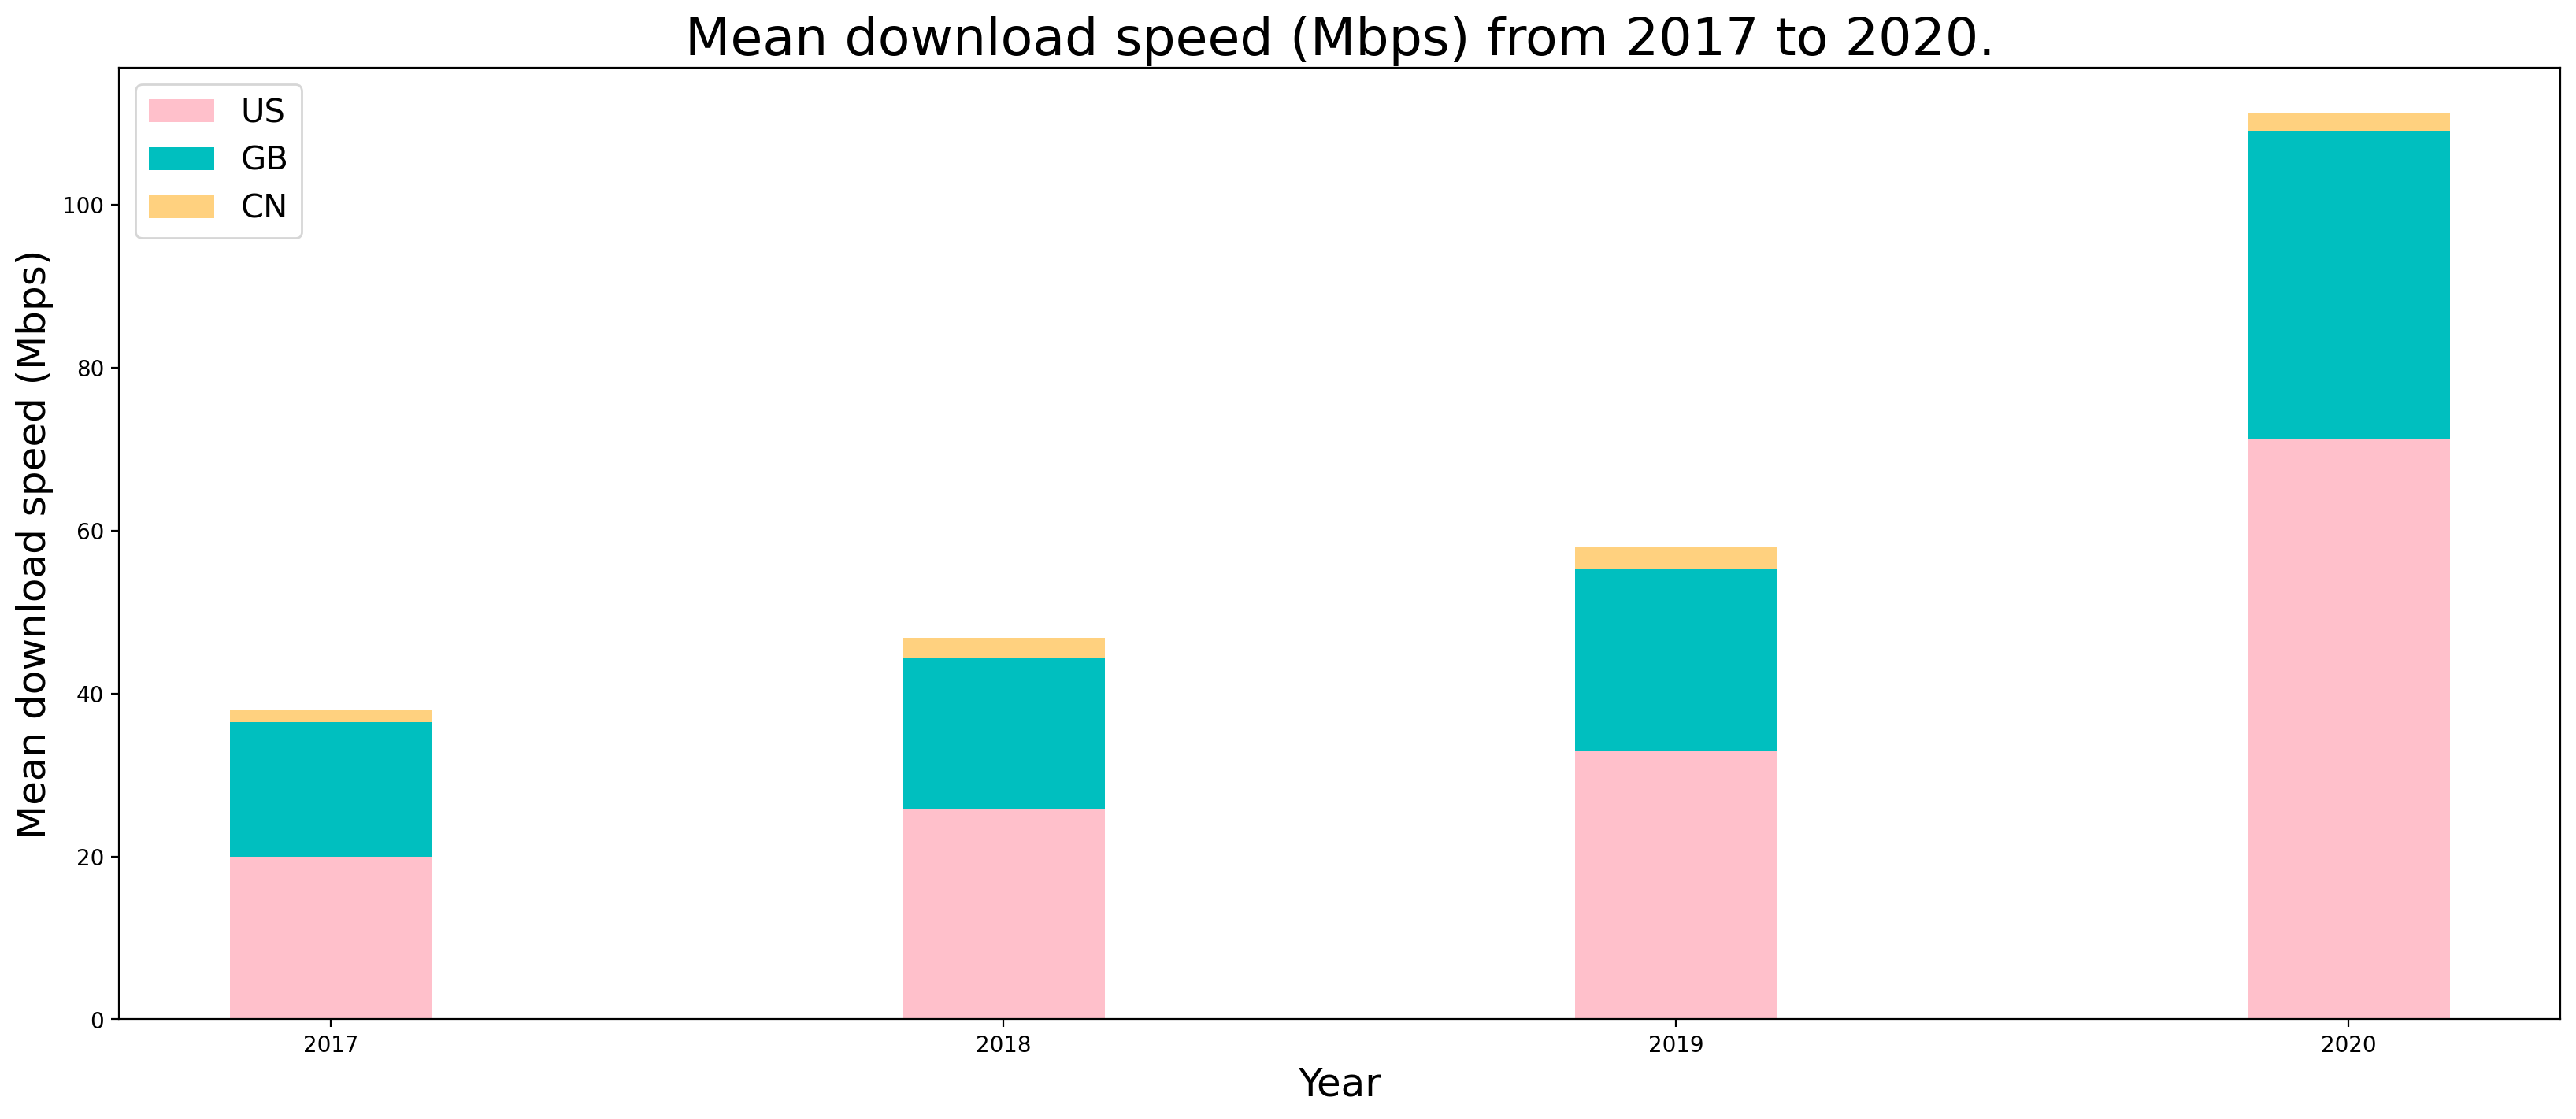

In [15]:
# Set the figuresize and dpi
plt.figure(figsize=(20, 8), dpi=200)
# Draw the bar
x = ['2017','2018','2019','2020']
y1 = speed_df.iloc[0:1 ,7:11].T.values.flatten()[::-1]
y2 = speed_df.iloc[1:2 ,7:11].T.values.flatten()[::-1]
y3 = speed_df.iloc[-1: ,7:11].T.values.flatten()[::-1]

# plt.plot(x,  y1,"b", marker='*', markersize=5, label="US")
# plt.plot(x,  y2,"r", marker='*', markersize=5, label="GB")
# plt.plot(x,  y3,"g", marker='*', markersize=5, label="CN")
a=0.3
plt.bar(x, y1, a, color = 'pink', label = 'US')
plt.bar(x, y2, a, bottom = y1,           # 堆叠在第一个上方
        color = 'c', label = 'GB')
plt.bar(x, y3, a, bottom = (y1 + y2), # 堆叠在第一个和第二个上方
        color = 'orange', alpha = 0.5,label = 'CN')

plt.legend(fontsize=15)
# cited by https://blog.csdn.net/weixin_43799652/article/details/101320976
# plt.xticks(x, fontsize=15) 
# plt.yticks(fontsize=15)
plt.title('Mean download speed (Mbps) from 2017 to 2020.',fontsize=24)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Mean download speed (Mbps)',fontsize=18)

plt.show()